# Product Sales Analysis

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [47]:
dat= pd.read_csv('C:/Users/vishn/OneDrive/Desktop/projects/Product sales insight/pro_sales.csv')

In [48]:
dat

,Date,Product,Category,Sales Rep,City,No.of Units,Price,Amount
0,08-01-2021,Dell XPS 13,Laptop,Tara,Bangalore,3,"2,001","6,003"
1,08-01-2021,OnePlus Buds,Headphone,Bruce,Bangalore,31,75,"2,325"
2,08-01-2021,Apple AirPods Pro,Headphone,Bruce,Bangalore,12,315,"3,780"
3,08-01-2021,HP Envy x360,Laptop,Tara,Bangalore,4,"1,080","4,320"
4,08-01-2021,iPhone 11 Pro,Phone,Tara,Bangalore,4,"1,575","6,300"
...,...,...,...,...,...,...,...,...
1555,31-12-2021,OnePlus Buds,Headphone,Laxmi,Hyderabad,59,75,"4,425"
1556,31-12-2021,Apple AirPods Pro,Headphone,Laxmi,Hyderabad,11,315,"3,465"
1557,31-12-2021,HP Envy x360,Laptop,Amar,Hyderabad,2,"1,080","2,160"
1558,31-12-2021,iPhone 11 Pro,Phone,Laxmi,Hyderabad,4,"1,575","6,300"


# Exploratory  Data Analysis

In [49]:
dat.isnull().sum()

Date           0
Product        0
Category       0
Sales Rep      0
City           0
No.of Units    0
Price          0
Amount         0
dtype: int64

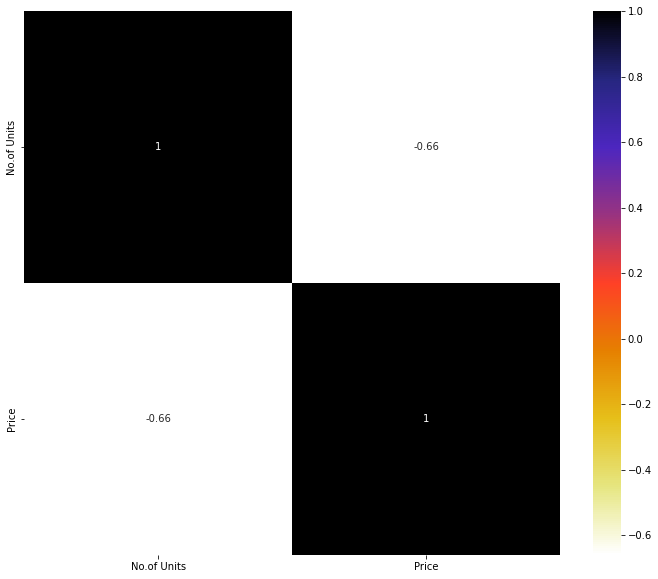

In [125]:
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

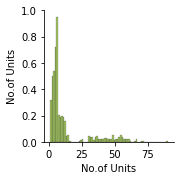

In [93]:
import seaborn as sns

sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               
                 diag_kws= {'color': '#82ad32'})

In [50]:
dat.shape

(1560, 8)

In [51]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1560 non-null   object
 1   Product      1560 non-null   object
 2   Category     1560 non-null   object
 3   Sales Rep    1560 non-null   object
 4   City         1560 non-null   object
 5   No.of Units  1560 non-null   int64 
 6   Price        1560 non-null   object
 7   Amount       1560 non-null   object
dtypes: int64(1), object(7)
memory usage: 97.6+ KB


# Converting required varaibles datatype from object to int

In [75]:
dat['Price'] = dat['Price'].str.replace(',', '').astype(int)

In [76]:
dat['Amount'] = dat['Amount'].str.replace(',', '').astype(int)

In [77]:
dat.describe()

,No.of Units,Price,Amount
count,1560.000000,1560.000000,1560.000000
mean,12.547436,972.666667,5426.029487
std,15.461232,671.469465,2686.706745
min,1.000000,75.000000,630.000000
25%,4.000000,315.000000,3240.000000
50%,6.000000,935.000000,4725.000000
75%,11.000000,1575.000000,7110.000000
max,90.000000,2001.000000,12006.000000


In [78]:
dat

,Date,Product,Category,Sales Rep,City,No.of Units,Price,Amount
0,08-01-2021,Dell XPS 13,Laptop,Tara,Bangalore,3,2001,6003
1,08-01-2021,OnePlus Buds,Headphone,Bruce,Bangalore,31,75,2325
2,08-01-2021,Apple AirPods Pro,Headphone,Bruce,Bangalore,12,315,3780
3,08-01-2021,HP Envy x360,Laptop,Tara,Bangalore,4,1080,4320
4,08-01-2021,iPhone 11 Pro,Phone,Tara,Bangalore,4,1575,6300
...,...,...,...,...,...,...,...,...
1555,31-12-2021,OnePlus Buds,Headphone,Laxmi,Hyderabad,59,75,4425
1556,31-12-2021,Apple AirPods Pro,Headphone,Laxmi,Hyderabad,11,315,3465
1557,31-12-2021,HP Envy x360,Laptop,Amar,Hyderabad,2,1080,2160
1558,31-12-2021,iPhone 11 Pro,Phone,Laxmi,Hyderabad,4,1575,6300


# Dependent and independent variables

In [112]:
X=dat.iloc[:,5:7]
y=dat.iloc[:,7:]
print(X)
print(y)

      No.of Units  Price
0               3   2001
1              31     75
2              12    315
3               4   1080
4               4   1575
...           ...    ...
1555           59     75
1556           11    315
1557            2   1080
1558            4   1575
1559           10    790

[1560 rows x 2 columns]
      Amount
0       6003
1       2325
2       3780
3       4320
4       6300
...      ...
1555    4425
1556    3465
1557    2160
1558    6300
1559    7900

[1560 rows x 1 columns]


# Train test split

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100, test_size=0.3)   

# Feature Selection

# Mutual Information Gain(Calculating Fscore and p value)

In [86]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

C:\Users\vishn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3.00818759, 2.24386106])

In [87]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

No.of Units    3.008188
Price          2.243861
dtype: float64

<AxesSubplot:>

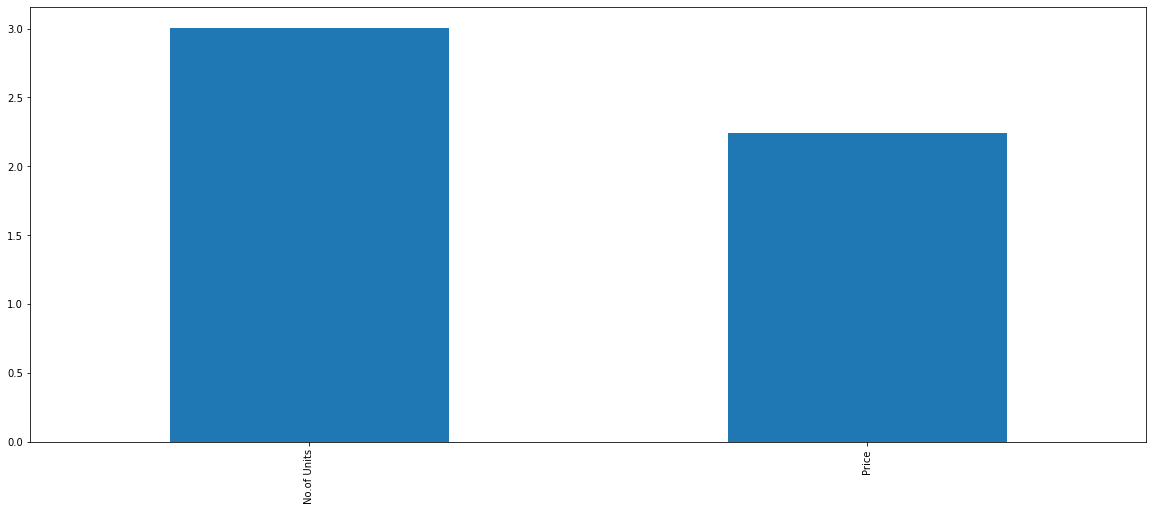

In [90]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# cross validation

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
clf = DecisionTreeClassifier(random_state=42)

In [96]:
k_folds = KFold(n_splits = 4)

scores = cross_val_score(clf, X, y, cv = k_folds)

In [97]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96153846 1.         1.         0.99358974 0.98397436]
Average CV Score:  0.9878205128205128
Number of CV Scores used in Average:  5


# Model fitting

# Linear Regression

In [103]:
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

LinearRegression()

In [105]:
#Prediction of test set
y_pred_mlr= mlr.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [[7161.13188612]
 [8538.35687401]
 [7006.39646829]
 [7057.9749409 ]
 [4063.23682248]
 [5337.81283553]
 [4536.35498745]
 [4682.17849377]
 [4639.51193267]
 [7109.55341351]
 [2730.95896346]
 [7109.55341351]
 [3341.13820598]
 [8589.93534662]
 [5286.23436292]
 [4114.81529509]
 [8589.93534662]
 [5234.65589031]
 [4166.3937677 ]
 [7057.9749409 ]
 [2782.53743607]
 [5286.23436292]
 [4484.77651485]
 [4484.77651485]
 [3444.2951512 ]
 [5337.81283553]
 [7006.39646829]
 [2885.69438128]
 [4166.3937677 ]
 [2834.11590868]
 [7057.9749409 ]
 [8589.93534662]
 [5286.23436292]
 [2937.27285389]
 [7057.9749409 ]
 [7161.13188612]
 [4630.60002116]
 [3092.00827171]
 [8589.93534662]
 [4372.70765813]
 [8589.93534662]
 [5389.39130813]
 [8589.93534662]
 [8641.51381923]
 [4587.93346006]
 [3092.00827171]
 [5286.23436292]
 [3040.42979911]
 [4011.65834988]
 [3195.16521693]
 [3341.13820598]
 [8589.93534662]
 [8486.77840141]
 [4587.93346006]
 [2730.95896346]
 [4536.35498745]
 [4381.61956963]
 [7006

In [122]:
print(y_pred)

[[7161.13188612]
 [8538.35687401]
 [7006.39646829]
 [7057.9749409 ]
 [4063.23682248]
 [5337.81283553]
 [4536.35498745]
 [4682.17849377]
 [4639.51193267]
 [7109.55341351]
 [2730.95896346]
 [7109.55341351]
 [3341.13820598]
 [8589.93534662]
 [5286.23436292]
 [4114.81529509]
 [8589.93534662]
 [5234.65589031]
 [4166.3937677 ]
 [7057.9749409 ]
 [2782.53743607]
 [5286.23436292]
 [4484.77651485]
 [4484.77651485]
 [3444.2951512 ]
 [5337.81283553]
 [7006.39646829]
 [2885.69438128]
 [4166.3937677 ]
 [2834.11590868]
 [7057.9749409 ]
 [8589.93534662]
 [5286.23436292]
 [2937.27285389]
 [7057.9749409 ]
 [7161.13188612]
 [4630.60002116]
 [3092.00827171]
 [8589.93534662]
 [4372.70765813]
 [8589.93534662]
 [5389.39130813]
 [8589.93534662]
 [8641.51381923]
 [4587.93346006]
 [3092.00827171]
 [5286.23436292]
 [3040.42979911]
 [4011.65834988]
 [3195.16521693]
 [3341.13820598]
 [8589.93534662]
 [8486.77840141]
 [4587.93346006]
 [2730.95896346]
 [4536.35498745]
 [4381.61956963]
 [7006.39646829]
 [4433.1980422

C:\Users\vishn\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

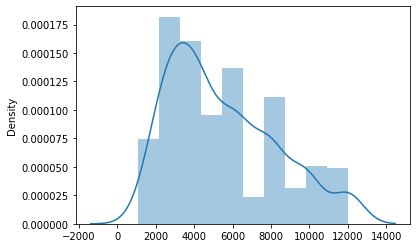

In [123]:
import seaborn as sns
sns.distplot(y_test)

# predicting new data

In [118]:
print(X_test)

      No.of Units  Price
1450            6   1575
882             4   2001
1426            3   1575
718             4   1575
499            47     75
...           ...    ...
1405           48     75
66              5   2001
969             3   1080
1521            2   1080
555             6   1080

[468 rows x 2 columns]


In [121]:
y_pred = mlr.predict(X_test)

# Model Evaluation

In [124]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1420.3298443370297
Mean Square Error: 3257215.0192754967
Root Mean Square Error: 1804.7756146611403
